<a href="https://colab.research.google.com/github/StellaCentis/Yacht_kaggle/blob/master/Final_project_Stella_Centis_VR495853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yacht and Motorboat Pricing analysis


In [1349]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1350]:
boat_df = pd.read_csv('boat_dataset.csv', encoding = 'latin-1') #UTF-8 can't decode byte 0xc3, so we have to read the file in this way, because there are no invalid bytes in that encoding

In [1351]:
boat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10344 non-null  object 
 1   Category                     10344 non-null  object 
 2   Boat Type                    10344 non-null  object 
 3   Manufacturer                 8954 non-null   object 
 4   Model                        10341 non-null  object 
 5   Boat name                    1313 non-null   object 
 6   Type                         10339 non-null  object 
 7   Year Built                   9777 non-null   float64
 8   Condition                    3375 non-null   object 
 9   Length                       10334 non-null  object 
 10  Width                        10281 non-null  object 
 11  Depth                        7234 non-null   object 
 12  Displacement                 5051 non-null   object 
 13  CE Design Catego

In [1352]:
boat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Built,9777.0,2004.830725,16.309045,1885.0,1999.0,2008.0,2017.0,2021.0
Cert Number of People,3597.0,9.355296,24.037107,1.0,7.0,8.0,10.0,1200.0
Number of Cabins,6475.0,2.149035,2.145005,-1.0,1.0,2.0,3.0,96.0
Number of beds,6407.0,4.345716,3.974223,-23.0,2.0,4.0,6.0,266.0
Number of Toilets,2156.0,1.763915,2.076365,1.0,1.0,1.0,2.0,84.0
Number of Bathrooms,463.0,1.289417,0.653360,1.0,1.0,1.0,1.0,6.0
Number of Showers,1941.0,1.550747,0.930096,1.0,1.0,1.0,2.0,10.0


In [1353]:
boat_df.head()

,Price,Category,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length,...,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Advertisement Date,Number of views last 7 days,Comments,Additional Comments,Equipment
0,"CHF 3.337,-",Power Boats,Motor Yacht,Rigiflex power boats,CAP 400,NaN,new boat from stock,2017.0,as new,4.00 m,...,NaN,NaN,NaN,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,NaN,226,NaN,Possibility to arrange it with a complete luxu...,NaN
1,"EUR 3.490,-",Power Boats,Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00 m,...,NaN,NaN,NaN,NaN,Germany Â» BÃ¶nningstedt,NaN,75,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,NaN
2,"CHF 3.770,-",Power Boats,Sport Boat,Marine power boats,370 S - Aluboot,NaN,new boat from stock,NaN,NaN,3.69 m,...,NaN,NaN,NaN,NaN,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,NaN,124,NaN,The lightweight and sleek rowing boat for 4 pe...,NaN
3,"DKK 25.900,-",Power Boats,Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00 m,...,NaN,NaN,NaN,NaN,Denmark Â» Svendborg,NaN,64,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,NaN
4,"SEK 35.000,-",Power Boats,Classic,NaN,Gullholmensnipa 21,NaN,Used boat,1974.0,good,6.30 m,...,NaN,500 h,NaN,NaN,Nordsee Â» VÃ¤stra FrÃ¶lunda,04.07.2020,131,NaN,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C..."


In [1354]:
boat_df.tail()

,Price,Category,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length,...,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Advertisement Date,Number of views last 7 days,Comments,Additional Comments,Equipment
10339,"EUR 4.516,-",Power Boats,Sport Boat,NaN,FOX BOATS 420C EC,NaN,new boat from stock,NaN,NaN,4.17 m,...,NaN,NaN,NaN,NaN,Germany Â» Hamburg Â» HAMBURG,NaN,94,"LÃ¤nge: 4,17m | Breite: 1,67m | max. Motorisie...",NaN,NaN
10340,"EUR 4.499,-",Power Boats,Sport Boat,BlueCraft power boats,BlueSloep 140,NaN,"new boat from stock,Unleaded",2020.0,NaN,4.40 m,...,Unleaded,NaN,NaN,NaN,Germany Â» Nordrhein-Westfalen Â» Wesel,NaN,354,NaN,The BlueSloep 140 is the smallest boat in the ...,NaN
10341,"EUR 4.300,-",Power Boats,Pontoon Boat,Whaly power boats,450 New Classic,NaN,new boat from stock,2018.0,new,4.37 m,...,NaN,NaN,NaN,NaN,Italy Â» Dormelletto,NaN,266,"Caratteristiche tecniche,,Materiale: Polietile...",NaN,NaN
10342,"EUR 3.500,-",Power Boats,Sport Boat,Fletcher power boats,Bravo,NaN,"Used boat,Unleaded",1992.0,good,4.27 m,...,Unleaded,10 h,NaN,NaN,Hungary Â» Ebes,23.07.2020,NaN,Trailer comes with two new tyres and new wheel...,NaN,"Battery,Fire Extinguisher,Full Enclosure,Speed..."
10343,"CHF 3.780,-",Power Boats,Fishing Boat,DarekCo power boats,Texas 360,NaN,new boat from stock,2019.0,new,3.60 m,...,NaN,NaN,NaN,NaN,Switzerland Â» Brienzersee Â» Brienz,NaN,194,NaN,Rowing and fishing boat in robust GFK laminate...,NaN


In [1355]:
boat_df.columns =  list(map(lambda x : x.replace(' ', '_').lower(), boat_df.columns)) #spaces replaced by _ and lower case letters

In [1356]:
boat_df['category'].value_counts() #check of the categories of these boats

Power Boats    10344
Name: category, dtype: int64

In [1357]:
boat_df.condition.value_counts() #check of the different types of conditions

very good                 1158
new                        918
as new                     511
good                       432
well-groomed               225
used                       114
to be done up               10
needs a reconditioning       3
for tinkers                  3
defect                       1
Name: condition, dtype: int64

In [1358]:
boat_df['length'].value_counts() #check of length: why is a column object and not int/float?

9.00 m     113
12.00 m    111
10.00 m    107
11.00 m     99
6.50 m      85
          ... 
3.72 m       1
23.30 m      1
26.63 m      1
15.74 m      1
3.60 m       1
Name: length, Length: 1628, dtype: int64

In [1359]:
#Length can be turned into float:
new_length = []
for i in range(10344):
  item = str(boat_df.loc[i,'length'])
  new_item = item.replace(' m','')
  value = float(new_item)
  new_length.append(value)

In [1360]:
new_length

[4.0,
 4.0,
 3.69,
 3.0,
 6.3,
 3.55,
 4.03,
 6.2,
 3.0,
 3.64,
 4.35,
 5.6,
 4.35,
 4.13,
 4.7,
 4.4,
 3.72,
 5.2,
 3.88,
 4.31,
 4.0,
 8.0,
 6.37,
 6.0,
 6.0,
 3.55,
 3.78,
 4.31,
 5.6,
 6.53,
 5.7,
 4.0,
 3.55,
 5.6,
 4.01,
 4.84,
 5.05,
 3.81,
 3.55,
 4.41,
 6.2,
 5.4,
 3.93,
 4.4,
 4.0,
 4.36,
 3.88,
 5.11,
 4.3,
 5.2,
 4.4,
 5.5,
 5.85,
 4.3,
 4.45,
 4.01,
 4.3,
 4.15,
 4.5,
 4.2,
 4.05,
 4.0,
 4.51,
 4.0,
 3.95,
 5.0,
 5.5,
 6.02,
 6.28,
 5.7,
 5.0,
 8.0,
 4.5,
 6.67,
 4.75,
 3.2,
 7.26,
 4.15,
 5.2,
 4.6,
 4.28,
 8.23,
 6.16,
 4.5,
 4.45,
 4.5,
 8.5,
 5.8,
 5.7,
 5.5,
 6.4,
 5.23,
 5.8,
 4.4,
 4.4,
 4.8,
 5.85,
 5.0,
 5.3,
 4.8,
 5.18,
 5.53,
 4.0,
 5.0,
 5.3,
 5.74,
 5.8,
 3.1,
 5.3,
 7.9,
 3.38,
 8.5,
 4.5,
 nan,
 4.45,
 5.5,
 6.0,
 5.65,
 4.88,
 4.51,
 4.8,
 8.4,
 5.7,
 6.8,
 9.0,
 3.99,
 6.18,
 7.0,
 6.0,
 4.43,
 4.99,
 4.5,
 5.51,
 8.5,
 7.25,
 5.9,
 7.8,
 12.0,
 12.5,
 7.15,
 7.02,
 7.02,
 6.3,
 4.9,
 6.5,
 7.03,
 5.79,
 5.2,
 6.13,
 7.8,
 6.0,
 7.4,
 7.62,
 5.07,
 5.1,
 

In [1361]:
#We have to assign the new column to the old one, in order to have one more float column 
boat_df['length'] = new_length

In [1362]:
boat_df.length

0        4.00
1        4.00
2        3.69
3        3.00
4        6.30
         ... 
10339    4.17
10340    4.40
10341    4.37
10342    4.27
10343    3.60
Name: length, Length: 10344, dtype: float64

In [1363]:
import math
import numpy as np

In [1364]:
#One person can be embarked for each linear meter of boat's length, therefore we can use this information in order to fill the nan values of this column
null_cert_people = np.isnan(boat_df['cert_number_of_people']) 

In [1365]:
boat_df['cert_number_of_people'][null_cert_people]

1       NaN
3       NaN
4       NaN
8       NaN
9       NaN
         ..
10327   NaN
10328   NaN
10334   NaN
10336   NaN
10339   NaN
Name: cert_number_of_people, Length: 6747, dtype: float64

In [1366]:
for i in boat_df['cert_number_of_people'][null_cert_people].index :
  a = math.modf(boat_df.loc[i,'length']) #modf is a funcion that returns the fractional and integer parts of the number in a two-item tuple 
  boat_df.loc[i, 'cert_number_of_people'] = a[1] #we take the integer part

In [1367]:
#We can notice we have gained more values
boat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        10344 non-null  object 
 1   category                     10344 non-null  object 
 2   boat_type                    10344 non-null  object 
 3   manufacturer                 8954 non-null   object 
 4   model                        10341 non-null  object 
 5   boat_name                    1313 non-null   object 
 6   type                         10339 non-null  object 
 7   year_built                   9777 non-null   float64
 8   condition                    3375 non-null   object 
 9   length                       10334 non-null  float64
 10  width                        10281 non-null  object 
 11  depth                        7234 non-null   object 
 12  displacement                 5051 non-null   object 
 13  ce_design_catego

In [1368]:
#Width can be turned into float as well
new_width = []
for i in range(10344):
  item = str(boat_df.loc[i,'width'])
  new_item = item.replace(' m','')
  value = float(new_item)
  new_width.append(value)

boat_df['width'] = new_width

In [1369]:
boat_df.depth

0           NaN
1           NaN
2        0.25 m
3           NaN
4        0.75 m
          ...  
10339       NaN
10340    0.22 m
10341       NaN
10342       NaN
10343       NaN
Name: depth, Length: 10344, dtype: object

In [1370]:
#Depth can be turned into float
new_depth = []
for i in range(10344):
  item = str(boat_df.loc[i,'depth'])
  new_item = item.replace(' m','')
  value = float(new_item)
  new_depth.append(value)

boat_df['depth'] = new_depth

In [1371]:
boat_df.dropna(subset = ['width'], inplace=True)

In [1372]:
boat_df['depth'].fillna(boat_df['depth'].mean(), inplace=True)

In [1373]:
boat_df.engine.value_counts().head(10) #check of the types of engines

Volvo Penta                            373
VOLVO                                  266
MAN                                    250
SUZUKI                                 188
VOLVO PENTA                            171
Mercury                                133
YAMAHA                                 120
MERCURY                                115
Mercruiser                             115
 (Permission for Lake of Constance)    106
Name: engine, dtype: int64

In [1374]:
boat_df.engine.fillna('unknown', inplace=True)

In [1375]:
boat_df.engine =  list(map(lambda x : str(x).replace(' ', '_').lower(), boat_df.engine)) #some are the same but for python are differend due to the uppercase letters

In [1376]:
boat_df.engine.value_counts().head(20)

unknown                                          795
volvo_penta                                      617
volvo                                            374
suzuki                                           300
man                                              280
mercury                                          253
yamaha                                           216
mercruiser                                       204
caterpillar                                      149
yanmar                                           136
cummins                                          115
mtu                                              108
_(permission_for_lake_of_constance)              106
honda                                             63
volvo_penta_d6                                    53
volvo_penta_d4                                    41
nanni                                             38
volvo_penta_ips_600                               33
mercruiser_(permission_for_lake_of_constance) 

In [1377]:
boat_df[pd.isnull(boat_df['fuel_type'])]['engine'].value_counts().head(6) #check of the first five (known) engines with unknown fuel type, in order to fill these null values

unknown                                712
_(permission_for_lake_of_constance)     89
volvo_penta                             54
yamaha                                  32
mercruiser                              27
mercury                                 26
Name: engine, dtype: int64

In [1378]:
#Ignoring the unknown values, the first five most common engines of the boats which have null-value fuel type are all diesel
boat_df.loc[pd.isnull(boat_df['fuel_type']),'fuel_type'] = 'Diesel'

In [1379]:
boat_df.location.value_counts().head(20)

Netherlands Â» In verkoophaven                 332
Croatia (Hrvatska)                             244
Italy Â» Toscana Â» Toscana                    181
Italy                                          171
France                                         158
Italy Â» Mar Tirreno                           129
Italy Â» Campania Â» Campania                  112
Netherlands                                     96
Spain Â» Mallorca Â» Mallorca                   96
Germany                                         80
Denmark Â» Svendborg                            71
Italy Â» Liguria Â» Liguria                     70
Croatia (Hrvatska) Â» INFO DD-YACHTING          69
Netherlands Â» onbekend                         68
Italy Â» Aprilia Marittima di Latisana (UD)     68
Italy Â» Sardegna Â» Sardegna                   58
Italy Â» Veneto Â» Veneto                       56
Germany Â» 1                                    53
Italy Â» Nord Adria                             53
Italy Â» Lazio Â» Lazio        

In [1380]:
def first_word(a_string):
  '''
  This function returns the first word of a string
  input: a_string
  output: first word of the input string
  '''
  all_words = a_string.split() #split is a method that puts in a list all words of the input string
  my_word= all_words[0]
  return my_word

In [1381]:
boat_df['location'].fillna('Unknown', inplace=True)

In [1382]:
new_location = []
for i in range(len(boat_df)):
  position = first_word(boat_df.iloc[i,32]) #location is the 32nd column
  new_location.append(position)

boat_df.location = new_location

In [1383]:
boat_df.location.value_counts()

Germany        1995
Italy          1842
France         1270
Switzerland    1173
Netherlands    1095
               ... 
Venezuela         1
Luxembourg        1
Philippines       1
Ã                 1
Thun              1
Name: location, Length: 132, dtype: int64

In [1384]:
boat_df.manufacturer.fillna('Unknown', inplace=True)
boat_df.model.fillna('Unknown', inplace=True)
boat_df.condition.fillna('unknown', inplace=True)

In [1385]:
#number_of_views_last_7_days into float 
new_views = []
for i in boat_df.index:
  item = boat_df.loc[i,'number_of_views_last_7_days']
  item = str(item).replace("'","")

  new_views.append(float(item))

boat_df['number_of_views_last_7_days'] = new_views

In [1386]:
boat_df['number_of_views_last_7_days'].fillna(boat_df['number_of_views_last_7_days'].mean(), inplace=True)

In [1387]:
boat_df.drop(['type','boat_name','year_built','displacement','ce_design_category','engine_performance','fuel_capacity','advertisement_date'],inplace= True, axis=1 )

In [1388]:
boat_df.drop(boat_df.iloc[:, 10:20], inplace=True, axis = 1)

In [1389]:
boat_df.drop(boat_df.iloc[:, 12:15], inplace=True, axis = 1)

In [1390]:
boat_df.drop(boat_df.iloc[:, 14::], inplace=True, axis = 1)

In [1391]:
boat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10281 entries, 0 to 10343
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        10281 non-null  object 
 1   category                     10281 non-null  object 
 2   boat_type                    10281 non-null  object 
 3   manufacturer                 10281 non-null  object 
 4   model                        10281 non-null  object 
 5   condition                    10281 non-null  object 
 6   length                       10281 non-null  float64
 7   width                        10281 non-null  float64
 8   depth                        10281 non-null  float64
 9   cert_number_of_people        10281 non-null  float64
 10  engine                       10281 non-null  object 
 11  fuel_type                    10281 non-null  object 
 12  location                     10281 non-null  object 
 13  number_of_views_

In [1392]:
boat_df.price.head(10)

0      CHF 3.337,-
1      EUR 3.490,-
2      CHF 3.770,-
3     DKK 25.900,-
4     SEK 35.000,-
5      EUR 3.399,-
6      CHF 3.650,-
7      CHF 3.600,-
9      EUR 3.333,-
10     EUR 3.300,-
Name: price, dtype: object

In [1393]:
#In order to understand which are the currencies in the column price:
currencies = []
for k in boat_df.index:
  currencies.append(first_word(str(boat_df.loc[k,'price'])))

currencies_series = pd.Series(currencies) #as value_counts() can't be used on a list
currencies_series.value_counts()

EUR      8645
CHF      1034
Â£        306
DKK       178
Price      44
USD        38
SEK        36
dtype: int64

In [1394]:
#What 'Price' really is?
for i in boat_df.index:
  if 'Price' in boat_df.loc[i,'price'].split():
    print(boat_df.loc[i, 'price'])

Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request
Price on request


In [1395]:
#Simplification of column price
new_prices = []
for i in boat_df.price.index:
  item = str(boat_df.loc[i,'price'])
  new_item = item.replace(',-','')
  new_prices.append(new_item)

boat_df.price = new_prices

In [1396]:
boat_df.price

0         CHF 3.337
1         EUR 3.490
2         CHF 3.770
3        DKK 25.900
4        SEK 35.000
            ...    
10339     EUR 4.516
10340     EUR 4.499
10341     EUR 4.300
10342     EUR 3.500
10343     CHF 3.780
Name: price, Length: 10281, dtype: object

In [1397]:
#example of what I'm going to do, using the tax of convesion of CHF in EUR
words_price = boat_df.loc[0, 'price'].split()
words_price[1] = float(words_price[1])*1000*1.01
price_in_euro = words_price[1]
price_in_euro

3370.37

In [1398]:
#modification of all the column price in EUR
for i in boat_df.index:
  if 'CHF' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    if len(words_price[1])<7:
      words_price[1] = (float(words_price[1])*1000)*1.01
      boat_df.loc[i, 'price'] = words_price[1]
    else:
      words_price[1] = float(words_price[1].replace('.',''))*1.01
      boat_df.loc[i, 'price'] = words_price[1]
  elif 'Â£' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    if len(words_price[1])<7:
      words_price[1] = (float(words_price[1])*1000)*1.13
      boat_df.loc[i, 'price'] = words_price[1]
    else:
      words_price[1] = float(words_price[1].replace('.',''))*1.13
      boat_df.loc[i, 'price'] = words_price[1]
  elif 'DKK' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    if len(words_price[1])<7:
      words_price[1] = (float(words_price[1])*1000)*0.13
      boat_df.loc[i, 'price'] = words_price[1]
    else:
      words_price[1] = float(words_price[1].replace('.',''))*0.13
      boat_df.loc[i, 'price'] = words_price[1]
  elif 'USD' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    if len(words_price[1])<7:
      words_price[1] = (float(words_price[1])*1000)*0.93
      boat_df.loc[i, 'price'] = words_price[1]
    else:
      words_price[1] = float(words_price[1].replace('.',''))*0.93
      boat_df.loc[i, 'price'] = words_price[1]
  elif 'SEK' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    if len(words_price[1])<7:
      words_price[1] = (float(words_price[1])*1000)*0.09
      boat_df.loc[i, 'price'] = words_price[1]
    else:
      words_price[1] = float(words_price[1].replace('.',''))*0.09
      boat_df.loc[i, 'price'] = words_price[1]
  elif 'EUR' in str(boat_df.loc[i, 'price']):
    words_price = boat_df.loc[i, 'price'].split()
    words_price[1] = float(words_price[1].replace('.',''))
    boat_df.loc[i, 'price'] = words_price[1]
  else: #the case of 'Price on request'
    pass


In [1399]:
boat_df.price

0        3370.37
1         3490.0
2         3807.7
3         3367.0
4         3150.0
          ...   
10339     4516.0
10340     4499.0
10341     4300.0
10342     3500.0
10343     3817.8
Name: price, Length: 10281, dtype: object

In [1400]:
mean_price = boat_df[boat_df.loc[:,'price'] != 'Price on request'].price.astype(float).mean() #mean of the numerical values of this column, that I'll use to fill the 'price on request' entries

In [1401]:
boat_df.loc[boat_df.loc[:,'price'] == 'Price on request', 'price'] = mean_price 

In [1402]:
boat_df.price = boat_df.price.astype(float) #column price into float

In [1403]:
boat_df.describe()

,price,length,width,depth,cert_number_of_people,number_of_views_last_7_days
count,1.028100e+04,10281.000000,10281.00000,10281.000000,10281.000000,10281.000000
mean,3.003486e+05,11.512953,3.51229,1.122363,10.909542,149.379988
std,9.741755e+05,5.975419,1.22392,2.049708,15.116609,149.646987
min,3.150000e+03,1.040000,0.01000,0.010000,1.000000,13.000000
25%,4.220000e+04,7.440000,2.54000,0.860000,7.000000,71.000000
50%,9.087000e+04,10.200000,3.30000,1.122363,10.000000,110.000000
75%,2.490000e+05,13.880000,4.25000,1.122363,13.000000,168.000000
max,3.100000e+07,100.000000,25.16000,85.000000,1200.000000,3263.000000


#Plots

In [1404]:
#In order to have a much more readable manufacturer (also because it is the main one):
mask = boat_df.manufacturer == 'BÃ©nÃ©teau power boats' 
boat_df.loc[mask,'manufacturer'] = 'Beneteau'

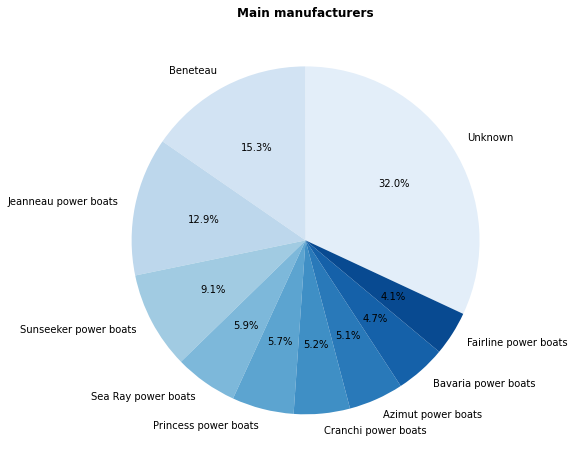

In [1405]:
#Plot to have an overview of the manufacturers of the power boats in this dataframe
colors = plt.get_cmap('Blues')(np.linspace(0.1, 0.9, 10))
plt.figure(figsize = (10,8))
plt.pie(boat_df.manufacturer.value_counts().head(10), labels = boat_df.manufacturer.value_counts().head(10).index, colors = colors, autopct = '%.1f%%', startangle = 335)
plt.title('Main manufacturers', fontweight = "bold")
plt.show()

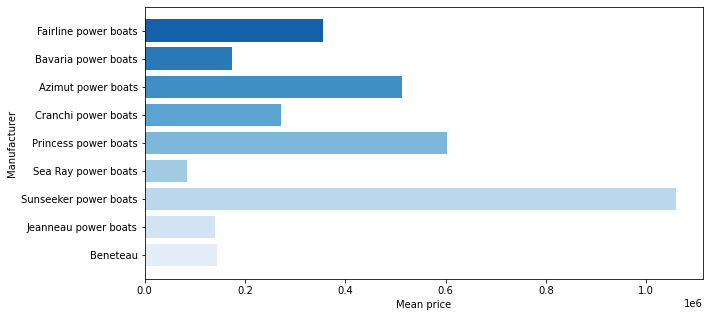

In [1406]:
#Horizontal bar chart where there are the mean prices of the first 9 (the same above) main manufacturers in comparison
labels = boat_df.manufacturer.value_counts().head(10).index[1::] #to not consider 'unknown'
data = np.array([boat_df[boat_df.loc[:, 'manufacturer'] == x].price.mean() for x in labels ])
fig2, ax2 = plt.subplots(figsize=(10,5))
plt.barh(labels, data, color = colors)
plt.xlabel('Mean price')
plt.ylabel('Manufacturer')
plt.show()

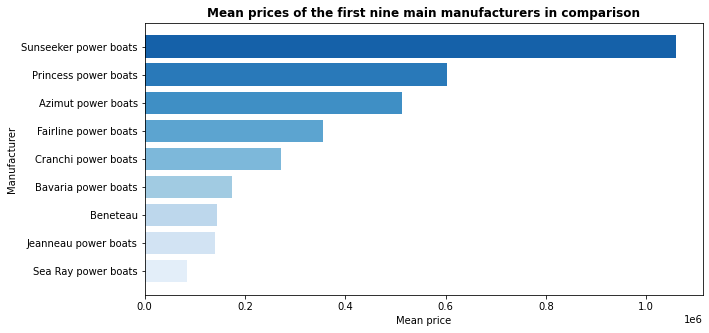

In [1407]:
#Sorted horizontal bar chart of above
labels = boat_df.manufacturer.value_counts().head(10).index[1::]
data = np.array([boat_df[boat_df.loc[:, 'manufacturer'] == x].price.mean() for x in labels ])
df = pd.DataFrame(
    dict(
        labels = labels,
        data = data
    )
)
df_sorted = df.sort_values('data')
fig2, ax2 = plt.subplots(figsize=(10,5))
plt.barh('labels','data', data = df_sorted, color = colors)
plt.title('Mean prices of the first nine main manufacturers in comparison', fontweight="bold")
plt.xlabel('Mean price')
plt.ylabel('Manufacturer')
plt.show()

In [1408]:
boat_df.corr()

,price,length,width,depth,cert_number_of_people,number_of_views_last_7_days
price,1.000000,0.566597,0.517411,0.066083,0.153867,-0.005160
length,0.566597,1.000000,0.870822,0.091349,0.341027,-0.131957
width,0.517411,0.870822,1.000000,0.084660,0.298175,-0.154803
depth,0.066083,0.091349,0.084660,1.000000,0.031377,0.016390
cert_number_of_people,0.153867,0.341027,0.298175,0.031377,1.000000,-0.046751
number_of_views_last_7_days,-0.005160,-0.131957,-0.154803,0.016390,-0.046751,1.000000


In [1409]:
import seaborn as sb

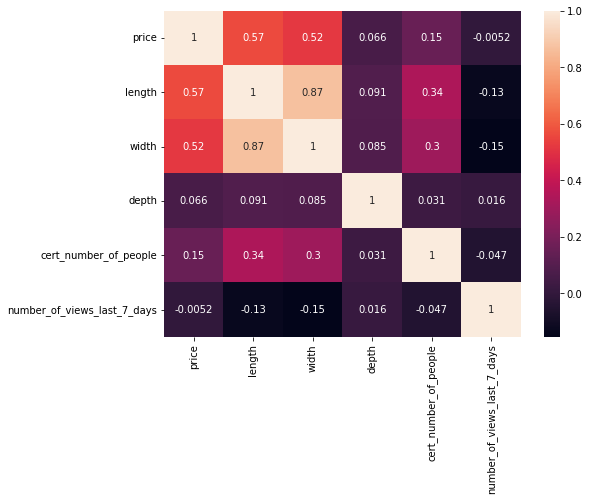

In [1410]:
#Correlation matrix
plt.figure(figsize=(8,6))
sb.heatmap(boat_df.corr(), annot=True)

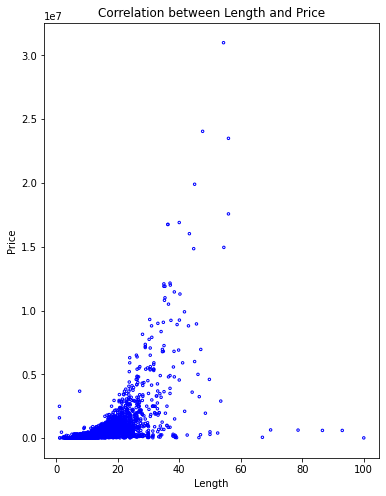

In [1411]:
#Length - Price
x = boat_df.length
y = boat_df.price
fig4 = plt.figure(figsize = (6,8)) 
plt.title('Correlation between Length and Price')
plt.scatter(x,y, s = 6, facecolors='none', edgecolors='b')
plt.xlabel('Length')
plt.ylabel('Price')
plt.show() #the resul is too high and too "far"

In [1412]:
boat_df[boat_df.loc[:, 'length'] == boat_df.length.max()] #check of the reason why some points seem to be so closed to 0: they are pretty small rather than 1e7

,price,category,boat_type,manufacturer,model,condition,length,width,depth,cert_number_of_people,engine,fuel_type,location,number_of_views_last_7_days
9991,14500.0,Power Boats,Mega Yacht,Unknown,Otterkruiser 1000 AK,unknown,100.0,3.2,0.9,100.0,unknown,Diesel,Netherlands,289.0


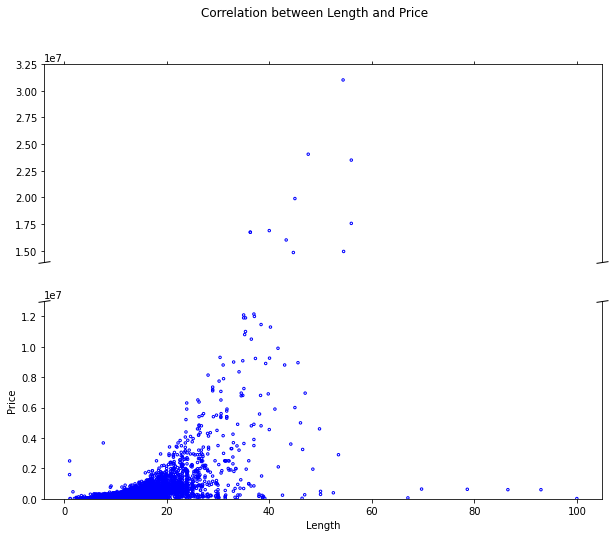

In [1413]:
fig5, (ax5_1, ax5_2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
fig5.subplots_adjust(hspace=0.2)  # adjust space between axes

fig5.suptitle('Correlation between Length and Price')
ax5_2.set_xlabel('Length')
plt.ylabel('Price')
#scatter plots in the two halves
ax5_1.scatter(x,y, s=6,  facecolors='none', edgecolors='b')
ax5_2.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')

# zoom-in the scatter plot due to the limit of the view to different portions of the data
ax5_1.set_ylim(1.4*1e7,3.25*1e7)  # outliers only
ax5_2.set_ylim(0,1.3*1e7)  # most of the data

# hide the spines between ax and ax2
ax5_1.spines['bottom'].set_visible(False)
ax5_2.spines['top'].set_visible(False)
ax5_1.xaxis.tick_top()
ax5_1.tick_params(labeltop=False)  # don't put tick labels at the top
ax5_2.xaxis.tick_bottom()


d = .15  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax5_1.plot([0, 1], [0, 0], transform=ax5_1.transAxes, **kwargs)
ax5_2.plot([0, 1], [1, 1], transform=ax5_2.transAxes, **kwargs)
plt.show()

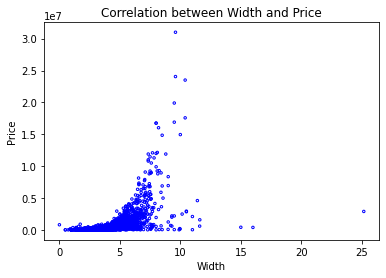

In [1414]:
#Width - Price
x = boat_df.width
y = boat_df.price
fig6 = plt.figure()
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Width and Price')
plt.xlabel('Width')
plt.ylabel('Price')
plt.show()

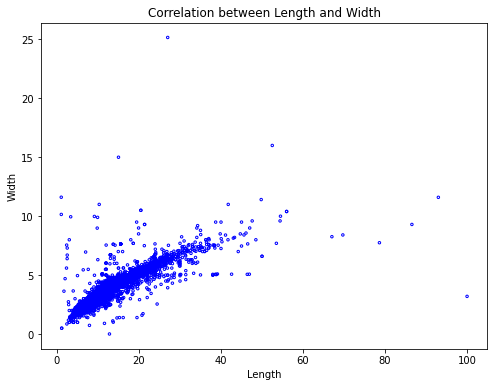

In [1415]:
#Length - Width
x = boat_df.length
y = boat_df.width
fig7 = plt.figure(figsize = (8,6))
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Length and Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

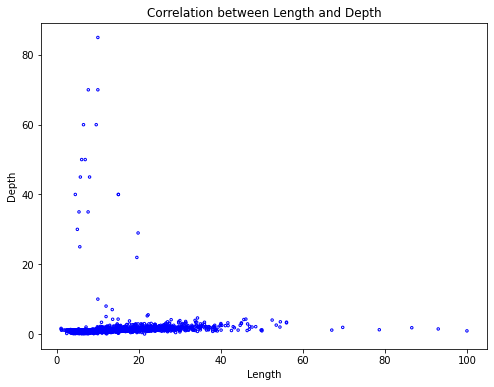

In [1416]:
#Length - Depth
x = boat_df.length
y = boat_df.depth
fig8 = plt.figure(figsize= (8,6))
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Length and Depth')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.show()

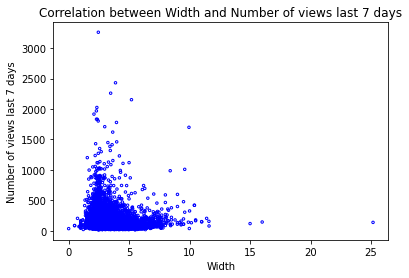

In [1417]:
#Width - Number of views last 7 days
x = boat_df.width
y = boat_df.number_of_views_last_7_days
fig9 = plt.figure()
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Width and Number of views last 7 days')
plt.xlabel('Width')
plt.ylabel('Number of views last 7 days')
plt.show()

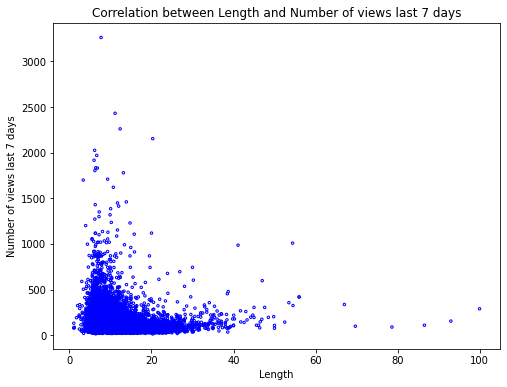

In [1418]:
#Length - Number of views last 7 days
x = boat_df.length
y = boat_df.number_of_views_last_7_days
fig8 = plt.figure(figsize = (8,6))
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Length and Number of views last 7 days')
plt.xlabel('Length')
plt.ylabel('Number of views last 7 days')
plt.show()

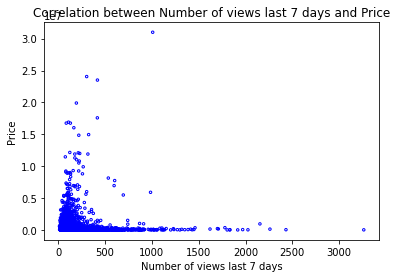

In [1419]:
#Number of views last 7 days - Price
x = boat_df.number_of_views_last_7_days
y = boat_df.price
fig9 = plt.figure()
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Number of views last 7 days and Price')
plt.xlabel('Number of views last 7 days')
plt.ylabel('Price')
plt.show()

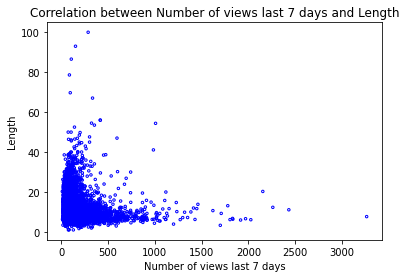

In [1420]:
#Number of views last 7 days - Length
x = boat_df.number_of_views_last_7_days
y = boat_df.length
fig10 = plt.figure()
plt.scatter(x,y, s = 6,  facecolors='none', edgecolors='b')
plt.title('Correlation between Number of views last 7 days and Length')
plt.xlabel('Number of views last 7 days')
plt.ylabel('Length')
plt.show()

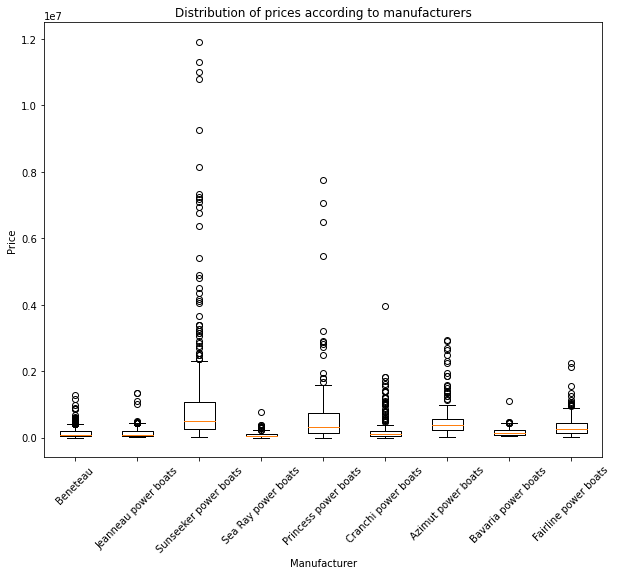

In [1421]:
#Box plot representing the distribution of prices according to manufacturers
labels = boat_df.manufacturer.value_counts().head(10).index[1::]
data_boxplot = np.array([boat_df[boat_df.loc[:, 'manufacturer'] == x].price for x in labels ], dtype = object)

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(data_boxplot)
ax.set_title("Distribution of prices according to manufacturers")
ax.set_xticklabels( labels , rotation = 45)
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Price")
plt.show()

In [1422]:
boat_df.engine.value_counts()[1:5] #the first is 'unknown'

volvo_penta    617
volvo          374
suzuki         300
man            280
Name: engine, dtype: int64

<Figure size 720x720 with 0 Axes>

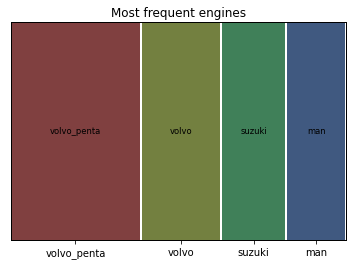

In [1423]:
#Mosaic plot for 4 most frequent engines
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize = (10,10))
mosaic(boat_df.engine.value_counts()[1:5],  title='Most frequent engines')
plt.show()

<Figure size 720x720 with 0 Axes>

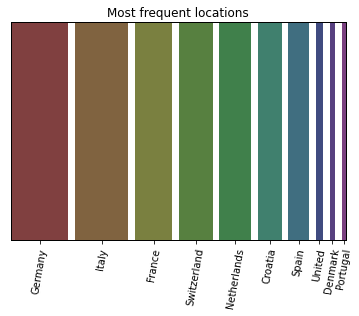

In [1424]:
#Mosaic plot for 10 most frequent locations
plt.figure(figsize = (10,10))
data_mosaic = boat_df.location.value_counts().head(10)
labelizer = lambda k: ''
mosaic(data_mosaic, gap = 0.025, title='Most frequent locations', label_rotation = 80, labelizer = labelizer)
plt.show()

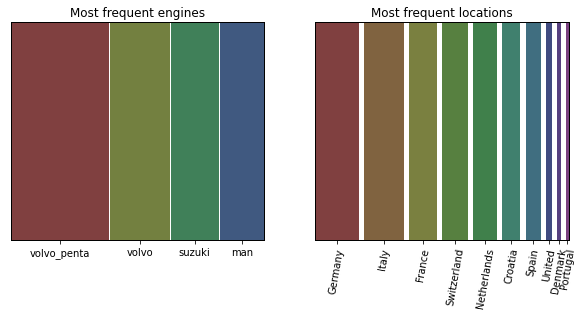

In [1425]:
#Seen together
fig_1 = plt.figure(figsize=(10,4))
ax_1 = fig_1.add_subplot(1,2,1) 
ax_2 = fig_1.add_subplot(1,2,2) 
mosaic(boat_df.engine.value_counts()[1:5],  title='Most frequent engines', labelizer = labelizer, ax = ax_1)
mosaic(data_mosaic, gap = 0.025, title='Most frequent locations', label_rotation = 80, labelizer = labelizer, ax = ax_2)
plt.show()

In [1426]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [1427]:
#The condition adjectives can be turned to numbers and can be grouped into three wider classes - unknown, good, bad - through feature engineering
replace_dict = {
    'as new' : 1,
    'new': 1,
    'very good': 1,
    'well-groomed': 1,
    'good': 1,
    'used': 0,
    'to be done up': 0,
    'defect': 0,
    'needs a reconditioning': 0,
    'for tinkers': 0,
    'unknown': 0
}
boat_df.condition.replace(replace_dict, inplace = True)

In [1428]:
boat_df.condition.unique()

array([1, 0])

In [1429]:
boat_df.corr()

,price,condition,length,width,depth,cert_number_of_people,number_of_views_last_7_days
price,1.000000,-0.072027,0.566597,0.517411,0.066083,0.153867,-0.005160
condition,-0.072027,1.000000,-0.218925,-0.234791,0.014322,-0.083693,0.392573
length,0.566597,-0.218925,1.000000,0.870822,0.091349,0.341027,-0.131957
width,0.517411,-0.234791,0.870822,1.000000,0.084660,0.298175,-0.154803
depth,0.066083,0.014322,0.091349,0.084660,1.000000,0.031377,0.016390
cert_number_of_people,0.153867,-0.083693,0.341027,0.298175,0.031377,1.000000,-0.046751
number_of_views_last_7_days,-0.005160,0.392573,-0.131957,-0.154803,0.016390,-0.046751,1.000000


In [1430]:
x = boat_df.number_of_views_last_7_days #we want to predict the condition of the boat according to how many views they had in last 7 days
y = boat_df.condition

In [1431]:
#Classification model type 1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 22)
model = RandomForestClassifier(random_state = 42)
model.fit(x_train.to_numpy().reshape(-1,1), y_train)
y_pred = model.predict(x_test.to_numpy().reshape(-1,1))
print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.7520661157024794


In [1432]:
#Classification model type 2, with higher accuracy
x = boat_df[['number_of_views_last_7_days', 'price', 'length', 'width', 'depth']]
model = RandomForestClassifier(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 22)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print('accuracy = ', acc) #we can see that this features works better: the accuracy increased

accuracy =  0.8016528925619835


In [1433]:
#using KFold we can be more accurate:
kf = KFold(n_splits=20, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(x): 
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  accuracies.append(acc)

real_acc = sum(accuracies)/len(accuracies)
print('realistic accuracy = ', real_acc)

realistic accuracy =  0.7950589324166072
